In [203]:
from icecream import ic 
import pandas as pd # vibe QED
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
from neuroml.nml.nml import parse as nmlparse
import math

In [64]:
def find_minmax(ds):
    minmin = 99999
    maxmax = -99999
    for Tempeh in ds: #Tempeh is temperature
        tractor = ds[Tempeh] #tractor is trace
        thismin = min(tractor)
        thismax = max(tractor)
        if thismin < minmin:
            minmin = thismin
        if thismax > maxmax:
            maxmax = thismax
    return minmin,maxmax

In [274]:
planes = ['v','caConc','m','h','n','x','k','l','r','z','q']
dend_meas = ['caConc','r','z','q']

cells = ["C1A","C6A", "C10", "C11A", "C15A", "C16", "C20A", "C21A", "C21B", "C23", "C25A", "C25C", "C28B", "C31", "C32B", "C45A", "C46A", "C46B", "C48", "C49A", "C49B", "C49C", "C50A", "C50B", "C51A", "C51B", "C51C", "C51D"]
cells = ['C10','C11A','C21B','C23','C31','C51A','C51B']
cells = ["C11A"]

complexities = []

for cellName in cells:
    thiscell_comp = []
    print(f"Printing: {cellName}")
    dat_file_1 = f"{cellName}_0_20to40_step0.1_v_nopulse.csv"
    set_1 = pd.read_csv(dat_file_1,index_col=0)
    setT_1 = pd.DataFrame.transpose(set_1)
    vartraces = {}
    allvar_comp = []
    minv,maxv = find_minmax(setT_1)
    for var in planes:
        seg = 0
        if cellName == "C11A" or cellName == "C10" or cellName == "C16" or cellName == "C21A" or cellName == "C28B" or cellName == "C32B" or cellName == "C51D":
            dend_seg = 6
        elif cellName == "C48":
            dend_seg = 7
        elif cellName == "C25A" or cellName == "C46A" or cellName == "C50A":
            dend_seg = 2
        else:
            dend_seg = 5
        if var in dend_meas:
            seg = dend_seg
        dat_file_2 = f"{cellName}_{seg}_20to40_step0.1_{var}_nopulse.csv"
        set_2 = pd.read_csv(dat_file_2,index_col=0)
        setT_2 = pd.DataFrame.transpose(set_2)
        minr,maxr = find_minmax(setT_2)
        vartraces[var] = setT_2
        complies = []
        for TT in setT_2:
            setArray_1 = np.array(setT_1[TT])
            setArray_2 = np.array(setT_2[TT])
            H = np.histogram2d(setArray_1,setArray_2,bins=100,range=[[minv,maxv],[minr,maxr]])
            H = H[0].T
            total = sum(sum(H))
            count = 0
            for row in H:
                for column in row:
                    if column > 10.0:
                        count += 1
            complexity = count/total
            complies.append(complexity)
        max_varcomp = max(complies)
        norm_complies = [cc/max_varcomp for cc in complies]
        allvar_comp.append(norm_complies)
        
    for ii in range(0,len(allvar_comp[0])):
        total = 0
        for varvar in allvar_comp:
            total += varvar[ii]/len(allvar_comp)
        thiscell_comp.append(total)
    
    complexities.append(thiscell_comp)
    
    ic()

Printing: C10


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:21:11.480


Printing: C11A


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:21:36.639


Printing: C21B


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:22:02.125


Printing: C23


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:22:27.363


Printing: C31


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:22:53.186


Printing: C51A


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:23:18.284


Printing: C51B


ic| <ipython-input-274-9927b3897ac7>:61 in <module> at 18:23:43.473


## Now let's plot all the complexity traces.

Plotted cell: C10

----------------------------------------------------------------------



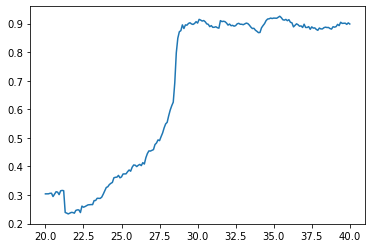

Plotted cell: C11A

----------------------------------------------------------------------



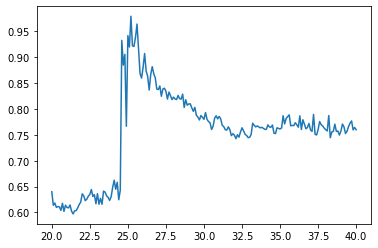

Plotted cell: C21B

----------------------------------------------------------------------



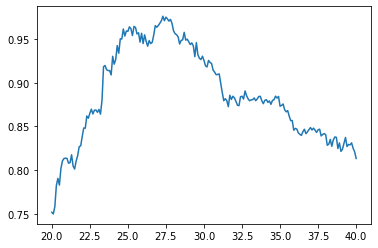

Plotted cell: C23

----------------------------------------------------------------------



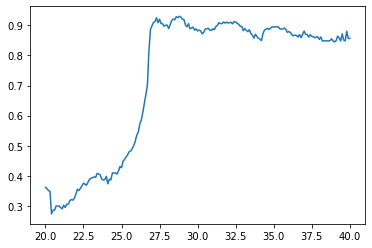

Plotted cell: C31

----------------------------------------------------------------------



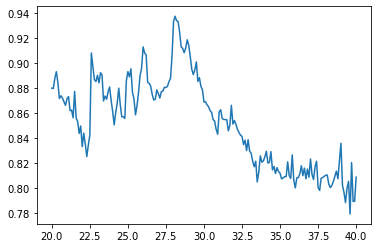

Plotted cell: C51A

----------------------------------------------------------------------



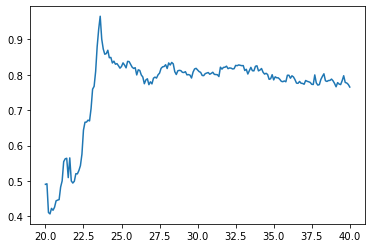

Plotted cell: C51B

----------------------------------------------------------------------



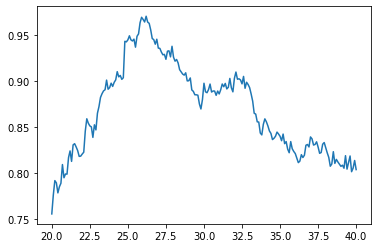

In [171]:
startT = 20
endT = 40
stepT = 0.1

temps = np.arange(startT, endT + stepT, stepT)

plotAll = True
plotOne = "C11A"

if plotAll:
    for counter in range(0,len(cells)):
        cellName = cells[counter]
        print(f"Plotted cell: {cellName}")
        plt.plot(temps,complexities[counter])
        print("\n----------------------------------------------------------------------\n")
        plt.show()
else:
    print(f"Plotted cell: {plotOne}")
    plt.plot(temps,complexities[plotOne])

In [278]:
def waterfall_plot(fig,ax,X,Y,Z):
    '''
    Make a waterfall plot
    Input:
        fig,ax : matplotlib figure and axes to populate
        Z : n,m numpy array. Must be a 2d array even if only one line should be plotted
        X,Y : n,m array
    '''
    # Set normalization to the same values for all plots
    norm = plt.Normalize(Z.min().min(), Z.max().max())
    # Check sizes to loop always over the smallest dimension
    n,m = Z.shape
    if n>m:
        X=X.T; Y=Y.T; Z=Z.T
        m,n = n,m

    for j in range(n):
        # reshape the X,Z into pairs 
        points = np.array([X[j,:], Z[j,:]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)        
        lc = LineCollection(segments, cmap='YlOrRd', norm=norm)
        # Set the values used for colormapping
        lc.set_array((Z[j,1:]+Z[j,:-1])/2)
        lc.set_linewidth(4) # set linewidth a little larger to see properly the colormap variation
        line = ax.add_collection3d(lc,zs=(Y[j,1:]+Y[j,:-1])/2, zdir='y')
        
    fig.colorbar(lc)

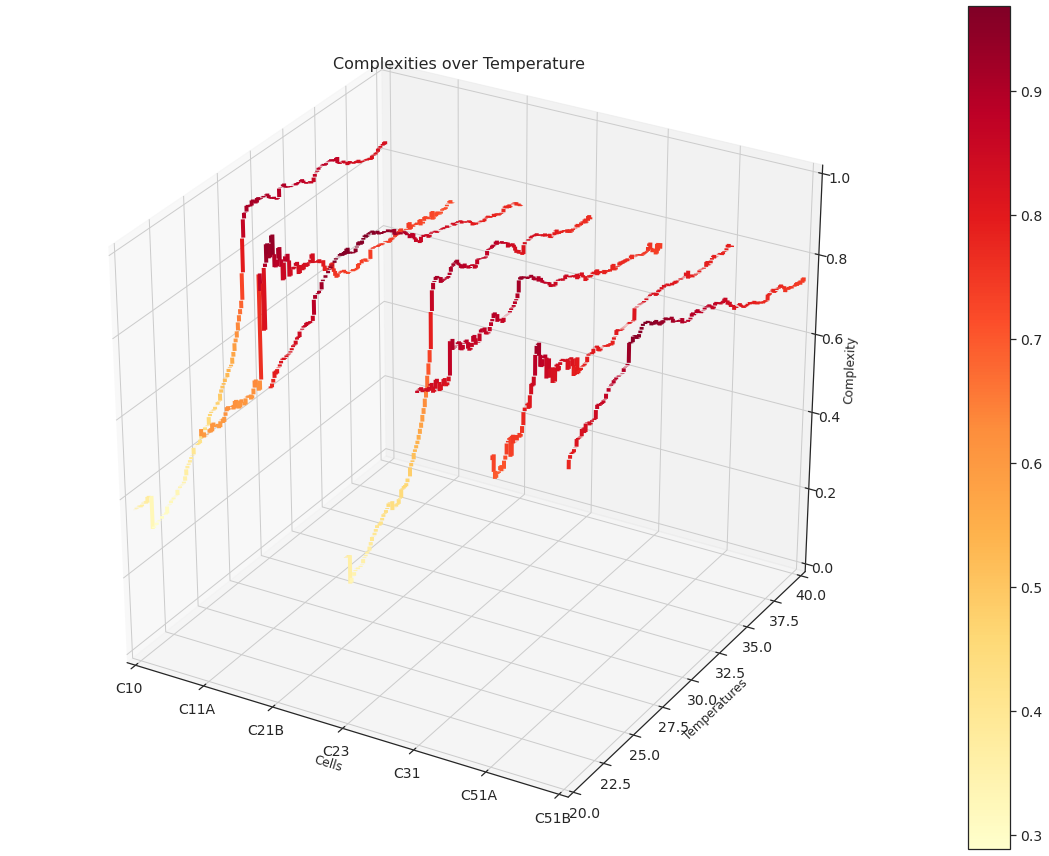

In [279]:
# X = Cells
# Y = Temperatures
# Z = Complexities

cellnums = np.linspace(0,6,7)

X,Y = np.meshgrid(cellnums,temps)
Z = np.array(complexities).T


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Cells') ; ax.set_xlim3d(0,6)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
ax.set_title('Complexities over Temperature')
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()

## The next step

Is to find a metric that we can use on the "Cells" axis. Let's try a few things;
- Total dendritic length
- Total proximal dendritic length
- Total membrane surface area (?)
- Total proximal dendritic membrane surface area
- Total proximal dendritic volume
- Total amount of (dendritic) segments
- Total amount of proximal dendritic segments
- Total soma to dendrite flux area

In [291]:
# Unpacking the cell morphologies:

morphologies = []
cells = ["C1A","C6A", "C10", "C11A", "C15A", "C16", "C20A", "C21A", "C21B", "C23", "C25A", "C25C", "C28B", "C31", "C32B", "C45A", "C46A", "C46B", "C48", "C49A", "C49B", "C49C", "C50A", "C50B", "C51A", "C51B", "C51C", "C51D"]
#cells = ["C11A"]
cells = ["C10", "C11A", "C21B", "C23", "C31", "C51A", "C51B"]

dend_length = {} # needs proximal and distal dendrite length
prox_dend_length = {} # needs proximal dendrite length
mem_surf_area = {} # needs all
prox_dend_mem_surf_area = {} # needs proximal dendrite
prox_dend_vol = {} # needs proximal dendrite
amt_seg = {} # needs all
amt_dend_seg = {} # needs prox and dist dend
amt_prox_dend_seg = {} # needs prox dend
soma_dend_flux_area = {} # needs dend that are connected to soma
dist_dend_mem_surf_area = {}
prox_over_dist_MSA = {}


for cell in cells:
    dend_length[cell] = 0
    prox_dend_length[cell] = 0
    mem_surf_area[cell] = 0
    prox_dend_mem_surf_area[cell] = 0
    prox_dend_vol[cell] = 0
    amt_seg[cell] = 0
    amt_dend_seg[cell] = 0
    amt_prox_dend_seg[cell] = 0
    soma_dend_flux_area[cell] = 0
    dist_dend_mem_surf_area[cell] = 0
    thiscelldoc = nmlparse(f"{cell}_scaled_exp_resample_5_relabel.cell.nml")
    morph = thiscelldoc.cells[0].morphology
    morphologies.append(morph)
    soma_segs = []
    for sg in morph.segment_groups:
        if sg.id == "Soma":
            for seg in sg.members:
                for ss in morph.segments:
                    if ss.id == seg.segments:
                        #ic(ss.id)
                        soma_segs.append(ss.id)
                        if ss.proximal != None:
                            if ss.distal == None:
                                print("Distal missing :(")
                            else:
                                distance = math.sqrt((ss.distal.x - ss.proximal.x)**2 + (ss.distal.y - ss.proximal.y)**2 + (ss.distal.z - ss.proximal.z)**2)
                                radius_par,radius = ss.proximal.diameter/2,ss.distal.diameter/2
                                #ic(distance,radius_par,radius)
                                if (distance-radius+radius_par) > 0 and (distance+radius-radius_par) > 0:
                                    if radius != radius_par:
                                        f = math.sqrt((distance-radius+radius_par)*(distance+radius-radius_par))/distance
                                        segment_area = math.pi*(f**2)*((distance/abs(radius-radius_par))+1)*abs(radius**2 - radius_par**2)
                                    else:
                                        segment_area = 2*math.pi*radius*distance
                                else:
                                    segment_area = 2*math.pi*max(radius,radius_par)*distance
                                mem_surf_area[cell] += segment_area
                                amt_seg[cell] += 1
                        else:
                            if ss.parent != None:
                                par_seg = ss.parent.segments
                                for sss in morph.segments:
                                    if sss.id == par_seg:
                                        x_s,y_s,z_s,r_s = sss.distal.x,sss.distal.y,sss.distal.z,sss.distal.diameter/2
                                distance = math.sqrt((ss.distal.x - x_s)**2 + (ss.distal.y - y_s)**2 + (ss.distal.z - z_s)**2)
                                radius_par,radius = r_s,ss.distal.diameter/2
                                if (distance-radius+radius_par) > 0 and (distance+radius-radius_par) > 0:
                                    if radius != radius_par:
                                        f = math.sqrt((distance-radius+radius_par)*(distance+radius-radius_par))/distance
                                        segment_area = math.pi*(f**2)*((distance/abs(radius-radius_par))+1)*abs(radius**2 - radius_par**2)
                                    else:
                                        segment_area = 2*math.pi*radius*distance
                                else:
                                    segment_area = 2*math.pi*max(radius,radius_par)*distance
                                mem_surf_area[cell] += segment_area
                                amt_seg[cell] += 1
                            else:
                                segment_area = 3*math.pi*((ss.distal.diameter)/2)**2 #3/4th of what it would normally be due to connections to dendrites.
                                mem_surf_area[cell] += segment_area
                                amt_seg[cell] += 1
                        #print("Handled: "+str(ss.id))
        elif sg.id == "proximal_dendrite_group":
            for groupie in sg.includes:
                for testgroup in morph.segment_groups:
                    if testgroup.id == groupie.segment_groups:
                        for seg in testgroup.members:
                            for ss in morph.segments:
                                if ss.id == seg.segments:
                                    # ss is now a segment in a proximal dendrite.
                                    first_comp = False
                                    if ss.parent.segments in soma_segs:
                                        first_comp = True
                                    if ss.proximal != None:
                                        if ss.distal == None:
                                            print("Distal missing :(")
                                        else:
                                            distance = math.sqrt((ss.distal.x - ss.proximal.x)**2 + (ss.distal.y - ss.proximal.y)**2 + (ss.distal.z - ss.proximal.z)**2)
                                            radius_par,radius = ss.proximal.diameter/2,ss.distal.diameter/2
                                            if (distance-radius+radius_par) > 0 and (distance+radius-radius_par) > 0:
                                                if radius != radius_par:
                                                    f = math.sqrt((distance-radius+radius_par)*(distance+radius-radius_par))/distance
                                                    segment_area = math.pi*(f**2)*((distance/abs(radius-radius_par))+1)*abs(radius**2 - radius_par**2)
                                                    segment_volume = (1/3)*math.pi*(f**4)*(distance/abs(radius_par-radius))*abs(radius**3 - radius_par**3)
                                                else:
                                                    segment_area = 2*math.pi*radius*distance
                                                    segment_volume = math.pi*(radius**2)*distance
                                            else:
                                                segment_area = 2*math.pi*max(radius,radius_par)*distance
                                                segment_volume = math.pi*(max(radius,radius_par)**2)*distance
                                    else:
                                        par_seg = ss.parent.segments
                                        for sss in morph.segments:
                                            if sss.id == par_seg:
                                                x_s,y_s,z_s,r_s = sss.distal.x,sss.distal.y,sss.distal.z,sss.distal.diameter/2
                                        distance = math.sqrt((ss.distal.x - x_s)**2 + (ss.distal.y - y_s)**2 + (ss.distal.z - z_s)**2)
                                        radius_par,radius = r_s,ss.distal.diameter/2
                                        if (distance-radius+radius_par) > 0 and (distance+radius-radius_par) > 0:
                                            if radius != radius_par:
                                                f = math.sqrt((distance-radius+radius_par)*(distance+radius-radius_par))/distance
                                                segment_area = math.pi*(f**2)*((distance/abs(radius-radius_par))+1)*abs(radius**2 - radius_par**2)
                                                segment_volume = (1/3)*math.pi*(f**4)*(distance/abs(radius_par-radius))*abs(radius**3 - radius_par**3)
                                            else:
                                                segment_area = 2*math.pi*radius*distance
                                                segment_volume = math.pi*(radius**2)*distance
                                        else:
                                            segment_area = 2*math.pi*max(radius,radius_par)*distance
                                            segment_volume = math.pi*(max(radius,radius_par)**2)*distance
                                    if first_comp ==  True:
                                        area_to_soma = math.pi*(radius_par)**2
                                    else:
                                        area_to_soma = 0
                                    
                                    dend_length[cell] += distance
                                    prox_dend_length[cell] += distance
                                    mem_surf_area[cell] += segment_area
                                    prox_dend_mem_surf_area[cell] += segment_area
                                    prox_dend_vol[cell] += segment_volume
                                    amt_seg[cell] += 1
                                    amt_dend_seg[cell] += 1
                                    amt_prox_dend_seg[cell] += 1
                                    soma_dend_flux_area[cell] += area_to_soma
                                    dist_dend_mem_surf_area[cell] += segment_area
        elif sg.id == "distal_dendrite_group":
            for groupie in sg.includes:
                for testgroup in morph.segment_groups:
                    if testgroup.id == groupie.segment_groups:
                        for seg in testgroup.members:
                            for ss in morph.segments:
                                if ss.id == seg.segments:
                                    # ss is now a segment in a distal dendrite.
                                    first_comp = False
                                    if ss.parent.segments in soma_segs:
                                        first_comp = True
                                    if ss.proximal != None:
                                        if ss.distal == None:
                                            print("Distal missing :(")
                                        else:
                                            distance = math.sqrt((ss.distal.x - ss.proximal.x)**2 + (ss.distal.y - ss.proximal.y)**2 + (ss.distal.z - ss.proximal.z)**2)
                                            radius_par,radius = ss.proximal.diameter/2,ss.distal.diameter/2
                                            if (distance-radius+radius_par) > 0 and (distance+radius-radius_par) > 0:
                                                if radius != radius_par:
                                                    f = math.sqrt((distance-radius+radius_par)*(distance+radius-radius_par))/distance
                                                    segment_area = math.pi*(f**2)*((distance/abs(radius-radius_par))+1)*abs(radius**2 - radius_par**2)
                                                    segment_volume = (1/3)*math.pi*(f**4)*(distance/abs(radius_par-radius))*abs(radius**3 - radius_par**3)
                                                else:
                                                    segment_area = 2*math.pi*radius*distance
                                                    segment_volume = math.pi*(radius**2)*distance
                                            else:
                                                segment_area = 2*math.pi*max(radius,radius_par)*distance
                                                segment_volume = math.pi*(max(radius,radius_par)**2)*distance
                                    else:
                                        par_seg = ss.parent.segments
                                        for sss in morph.segments:
                                            if sss.id == par_seg:
                                                x_s,y_s,z_s,r_s = sss.distal.x,sss.distal.y,sss.distal.z,sss.distal.diameter/2
                                        distance = math.sqrt((ss.distal.x - x_s)**2 + (ss.distal.y - y_s)**2 + (ss.distal.z - z_s)**2)
                                        radius_par,radius = r_s,ss.distal.diameter/2
                                        if (distance-radius+radius_par) > 0 and (distance+radius-radius_par) > 0:
                                            if radius != radius_par:
                                                f = math.sqrt((distance-radius+radius_par)*(distance+radius-radius_par))/distance
                                                segment_area = math.pi*(f**2)*((distance/abs(radius-radius_par))+1)*abs(radius**2 - radius_par**2)
                                                segment_volume = (1/3)*math.pi*(f**4)*(distance/abs(radius_par-radius))*abs(radius**3 - radius_par**3)
                                            else:
                                                segment_area = 2*math.pi*radius*distance
                                                segment_volume = math.pi*(radius**2)*distance 
                                        else:
                                            segment_area = 2*math.pi*max(radius,radius_par)*distance
                                            segment_volume = math.pi*(max(radius,radius_par)**2)*distance
                                    if first_comp ==  True:
                                        area_to_soma = math.pi*(radius_par)**2
                                    else:
                                        area_to_soma = 0
                                    
                                    dend_length[cell] += distance
                                    mem_surf_area[cell] += segment_area
                                    amt_seg[cell] += 1
                                    amt_dend_seg[cell] += 1
                                    soma_dend_flux_area[cell] += area_to_soma
                                    dist_dend_mem_surf_area[cell] += segment_area
                                    

In [292]:
'''

dend_length = {} # needs proximal and distal dendrite length
prox_dend_length = {} # needs proximal dendrite length
mem_surf_area = {} # needs all
prox_dend_mem_surf_area = {} # needs proximal dendrite
prox_dend_vol = {} # needs proximal dendrite
amt_seg = {} # needs all
amt_dend_seg = {} # needs prox and dist dend
amt_prox_dend_seg = {} # needs prox dend
soma_dend_flux_area = {} # needs dend that are connected to soma

'''

for cell in cells:
    prox_over_dist_MSA[cell] = prox_dend_mem_surf_area[cell] /  dist_dend_mem_surf_area[cell]

ic(dend_length,
   prox_dend_length,
   mem_surf_area,
   prox_dend_mem_surf_area,
   prox_dend_vol,
   amt_seg,
   amt_dend_seg,
   amt_prox_dend_seg,
   soma_dend_flux_area,
   prox_over_dist_MSA)

ic| dend_length: {'C10': 2787.2124330962333,
                  'C11A': 1339.5562097884183,
                  'C21B': 2623.07075088873,
                  'C23': 3626.7140589291134,
                  'C31': 1994.7840591899608,
                  'C51A': 1430.3098791865802,
                  'C51B': 2034.4056719647842}
    prox_dend_length: {'C10': 38.799800765629584,
                       'C11A': 46.5469854336414,
                       'C21B': 43.614350645936184,
                       'C23': 19.080310076358423,
                       'C31': 60.11201418914867,
                       'C51A': 30.838412385005135,
                       'C51B': 42.74740677965498}
    mem_surf_area: {'C10': 11247.701359223682,
                    'C11A': 6793.5369806789095,
                    'C21B': 8900.952913801168,
                    'C23': 14845.61372503645,
                    'C31': 12584.041675088865,
                    'C51A': 14486.971052756226,
                    'C51B': 17255.46547658084}
   

({'C10': 2787.2124330962333,
  'C11A': 1339.5562097884183,
  'C21B': 2623.07075088873,
  'C23': 3626.7140589291134,
  'C31': 1994.7840591899608,
  'C51A': 1430.3098791865802,
  'C51B': 2034.4056719647842},
 {'C10': 38.799800765629584,
  'C11A': 46.5469854336414,
  'C21B': 43.614350645936184,
  'C23': 19.080310076358423,
  'C31': 60.11201418914867,
  'C51A': 30.838412385005135,
  'C51B': 42.74740677965498},
 {'C10': 11247.701359223682,
  'C11A': 6793.5369806789095,
  'C21B': 8900.952913801168,
  'C23': 14845.61372503645,
  'C31': 12584.041675088865,
  'C51A': 14486.971052756226,
  'C51B': 17255.46547658084},
 {'C10': 539.3698414059681,
  'C11A': 903.1172929850792,
  'C21B': 952.3052865104671,
  'C23': 355.04281867317627,
  'C31': 1830.3309756500994,
  'C51A': 719.9912455053247,
  'C51B': 1406.7236006910014},
 {'C10': 1028.889408773862,
  'C11A': 998.2465657370695,
  'C21B': 1155.5474608871646,
  'C23': 223.77662043981735,
  'C31': 4195.709618096929,
  'C51A': 1286.676430527355,
  'C51B'

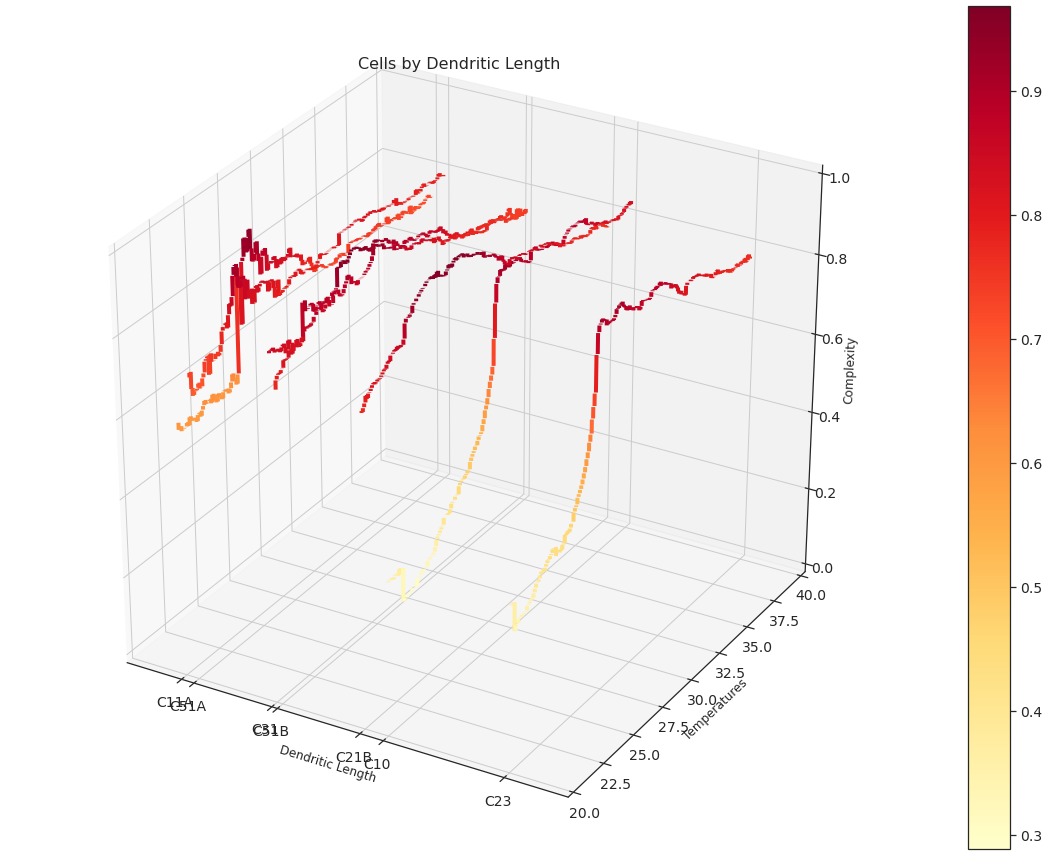

-----------------------------------------------------------


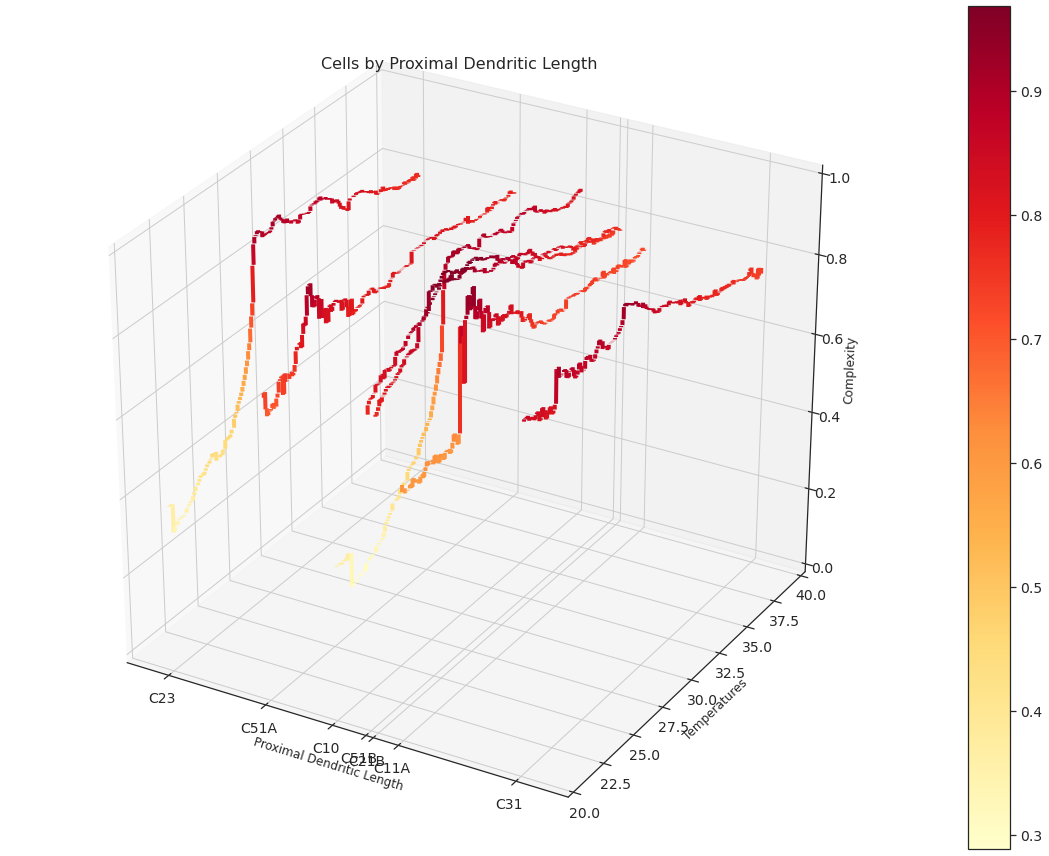

-----------------------------------------------------------


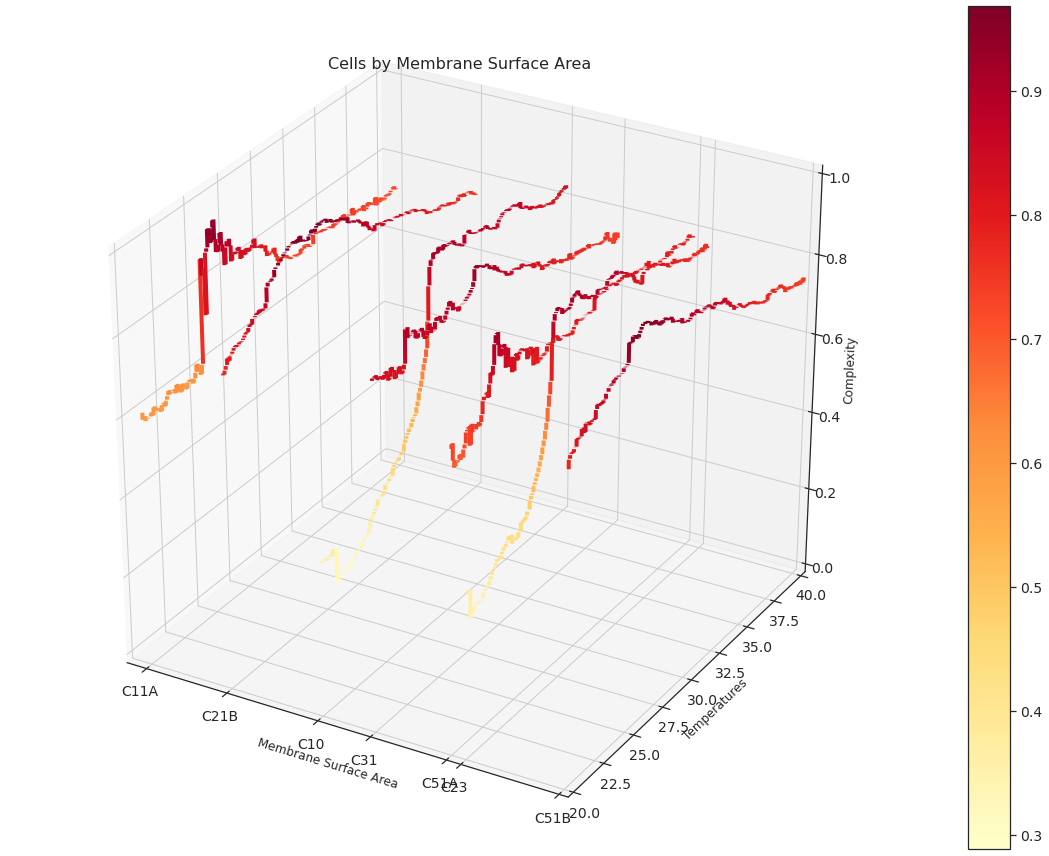

-----------------------------------------------------------


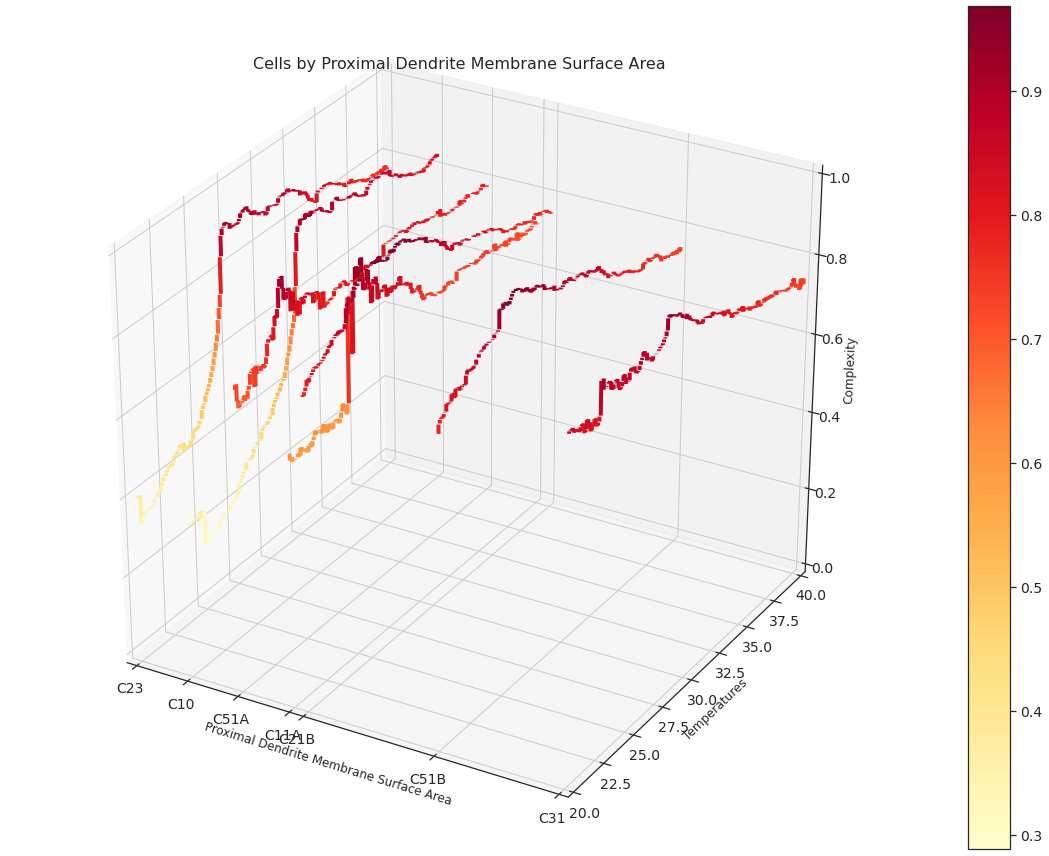

-----------------------------------------------------------


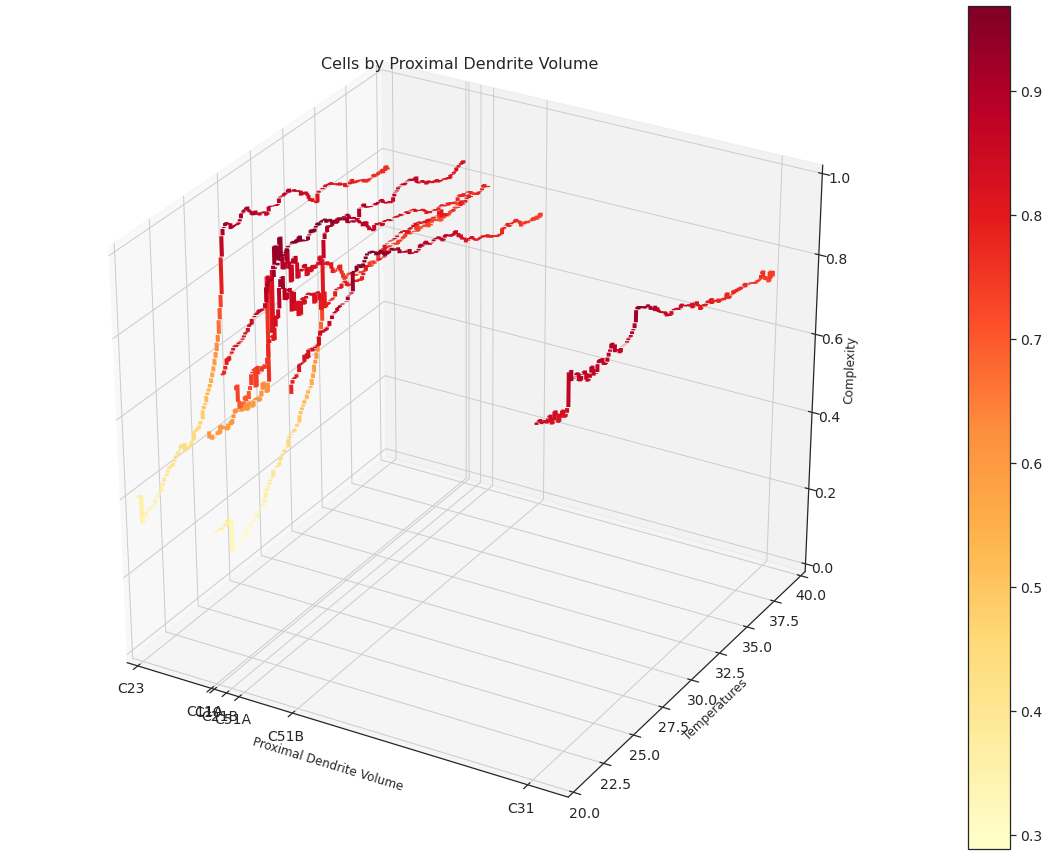

-----------------------------------------------------------


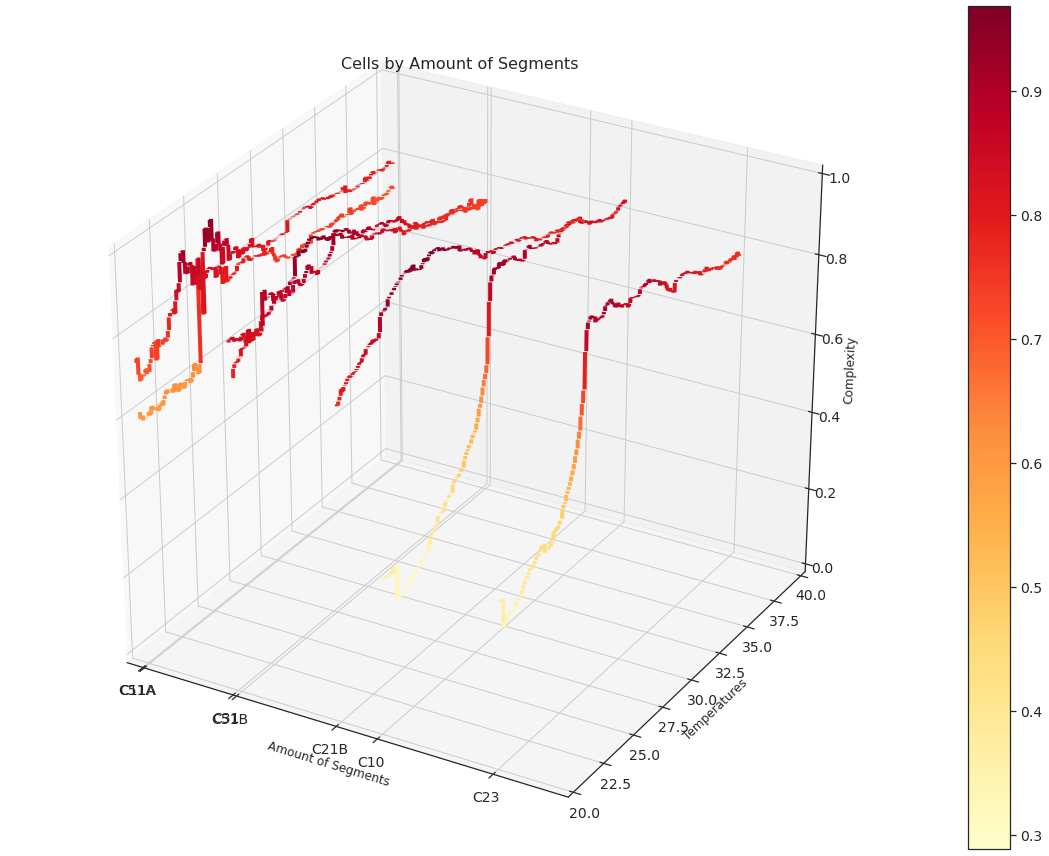

-----------------------------------------------------------


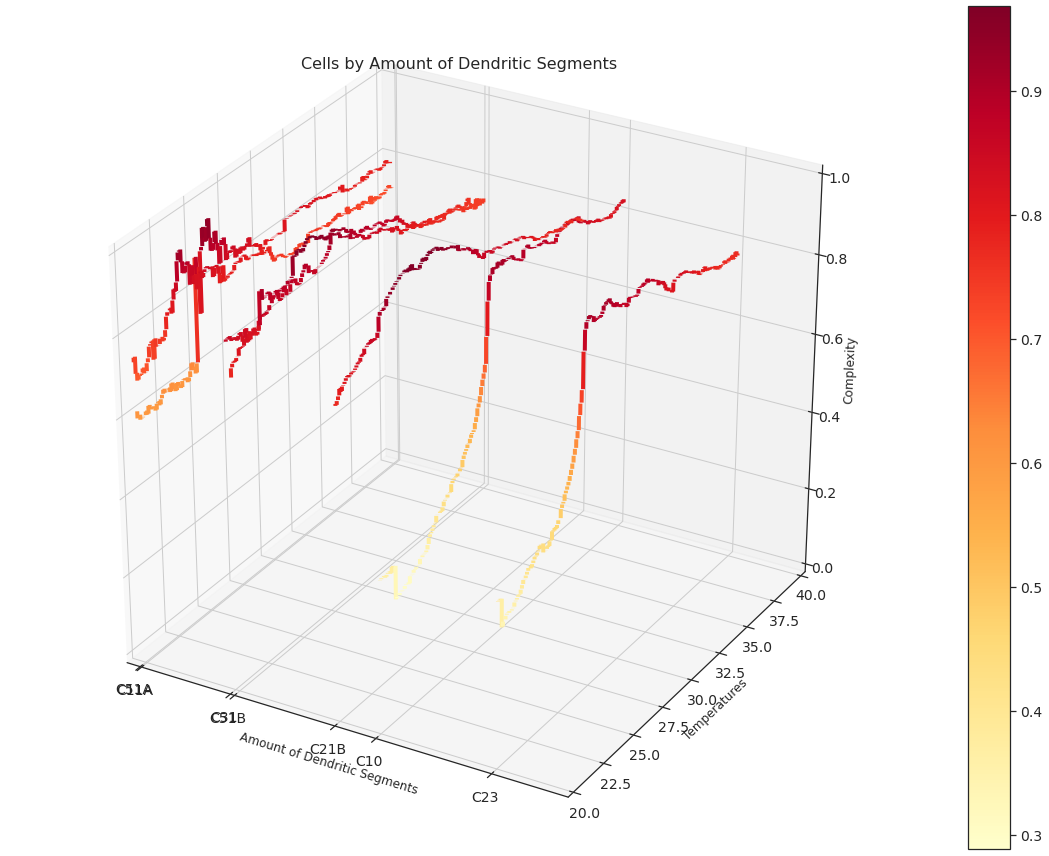

-----------------------------------------------------------


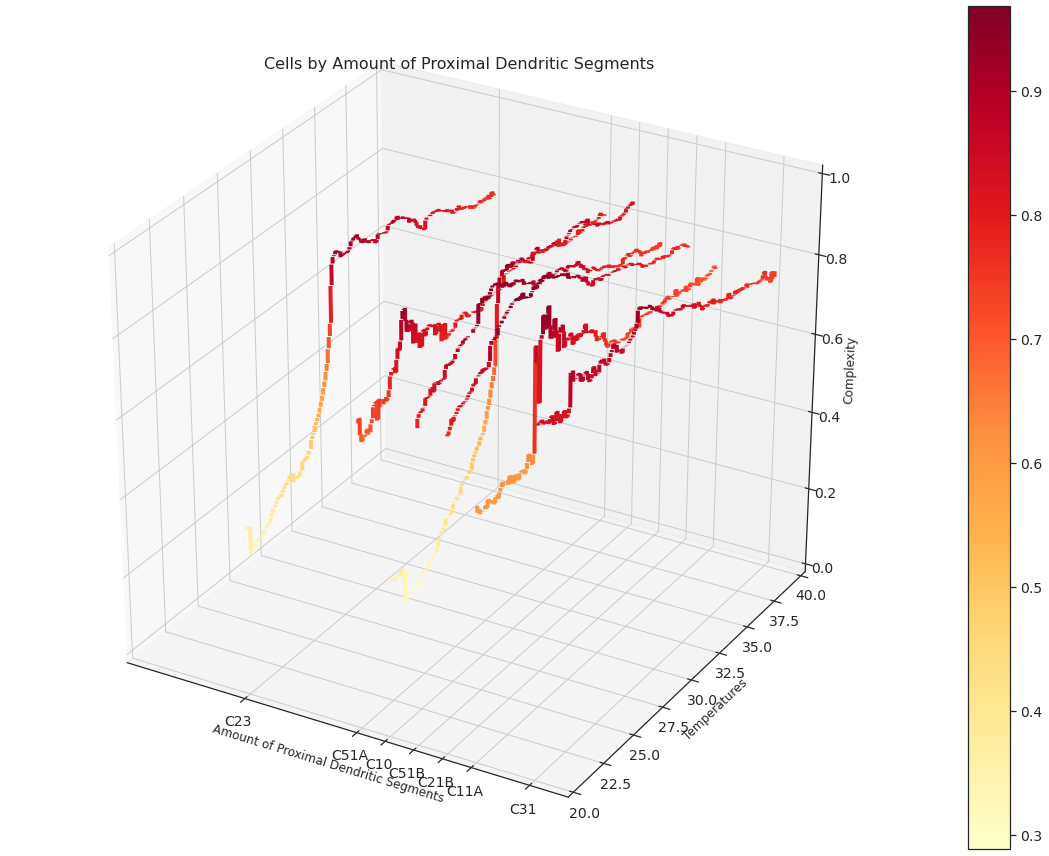

-----------------------------------------------------------


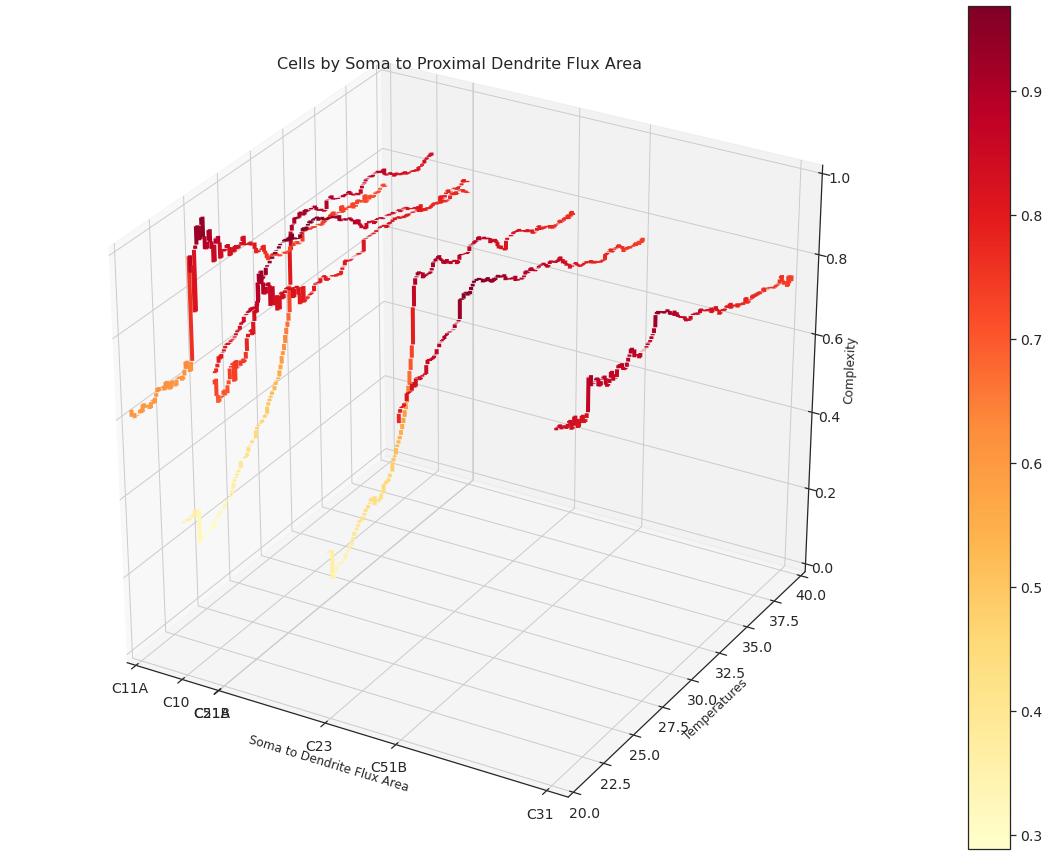

-----------------------------------------------------------


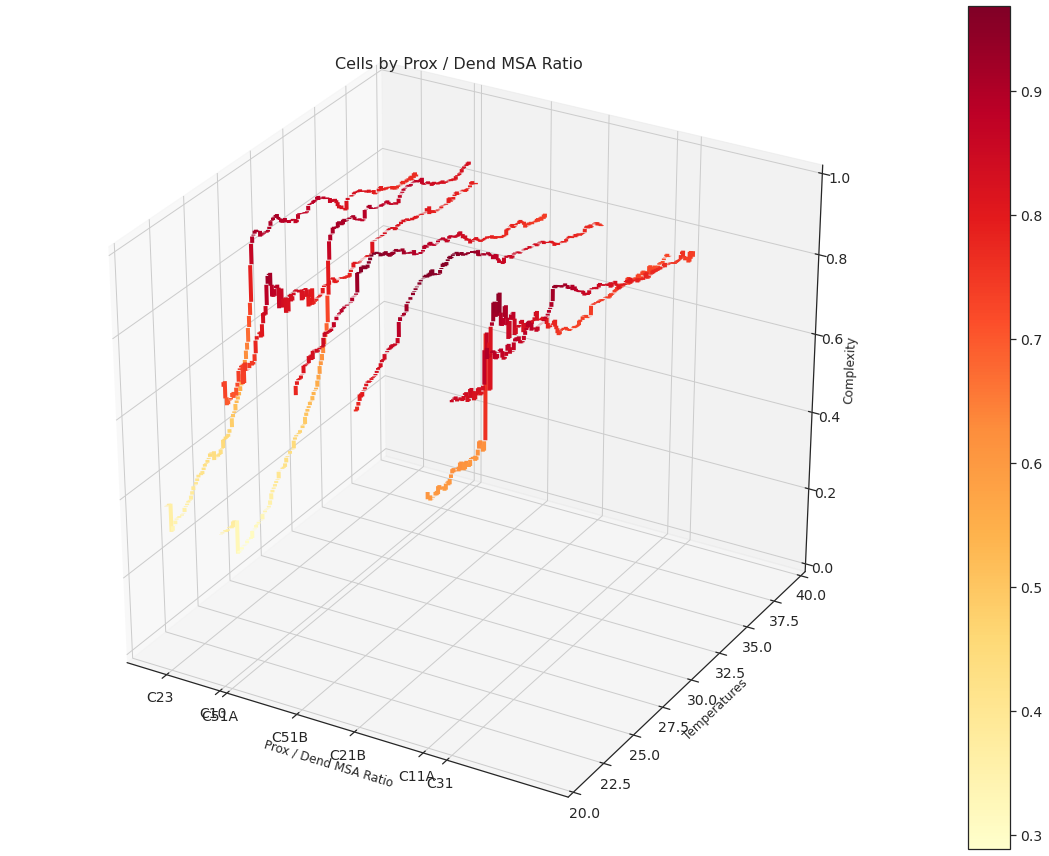

In [293]:
# Dendritic length

dend_length_list = []
for cell in cells:
    dend_length_list.append(dend_length[cell])

X,Y = np.meshgrid(dend_length_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Dendritic Length') ; ax.set_xlim3d(1000,4000)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Dendritic Length")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Proximal Dendritic length

prox_dend_length_list = []
for cell in cells:
    prox_dend_length_list.append(prox_dend_length[cell])

X,Y = np.meshgrid(prox_dend_length_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Proximal Dendritic Length') ; ax.set_xlim3d(15,65)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Proximal Dendritic Length")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Membrane Surface Area

mem_surf_area_list = []
for cell in cells:
    mem_surf_area_list.append(mem_surf_area[cell])

X,Y = np.meshgrid(mem_surf_area_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Membrane Surface Area') ; ax.set_xlim3d(6500,15000)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Membrane Surface Area")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Proximal Dendrite Membrane Surface Area

prox_dend_mem_surf_area_list = []
for cell in cells:
    prox_dend_mem_surf_area_list.append(prox_dend_mem_surf_area[cell])

X,Y = np.meshgrid(prox_dend_mem_surf_area_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Proximal Dendrite Membrane Surface Area') ; ax.set_xlim3d(350,1500)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Proximal Dendrite Membrane Surface Area")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Proximal Dendrite Volume

prox_dend_vol_list = []
for cell in cells:
    prox_dend_vol_list.append(prox_dend_vol[cell])

X,Y = np.meshgrid(prox_dend_vol_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Proximal Dendrite Volume') ; ax.set_xlim3d(200,4500)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Proximal Dendrite Volume")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Amount of Segments

amt_seg_list = []
for cell in cells:
    amt_seg_list.append(amt_seg[cell])

X,Y = np.meshgrid(amt_seg_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Amount of Segments') ; ax.set_xlim3d(300,900)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Amount of Segments")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Amount of Dendritic Segments

amt_dend_seg_list = []
for cell in cells:
    amt_dend_seg_list.append(amt_dend_seg[cell])

X,Y = np.meshgrid(amt_dend_seg_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Amount of Dendritic Segments') ; ax.set_xlim3d(300,900)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Amount of Dendritic Segments")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Amount of Proximal Dendritic Segments

amt_prox_dend_seg_list = []
for cell in cells:
    amt_prox_dend_seg_list.append(amt_prox_dend_seg[cell])

X,Y = np.meshgrid(amt_prox_dend_seg_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Amount of Proximal Dendritic Segments') ; ax.set_xlim3d(0,15)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Amount of Proximal Dendritic Segments")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Soma to Dendrite Flux Area

soma_dend_flux_area_list = []
for cell in cells:
    soma_dend_flux_area_list.append(soma_dend_flux_area[cell])

X,Y = np.meshgrid(soma_dend_flux_area_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Soma to Dendrite Flux Area') ; ax.set_xlim3d(20,1300)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Soma to Proximal Dendrite Flux Area")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()

print("-----------------------------------------------------------")

# Prox Dist MSA Ratio

prox_over_dist_MSA_list = []
for cell in cells:
    prox_over_dist_MSA_list.append(prox_over_dist_MSA[cell])

X,Y = np.meshgrid(prox_over_dist_MSA_list,temps)
Z = np.array(complexities).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z)

ax.set_xlabel('Prox / Dend MSA Ratio') ; ax.set_xlim3d(0.01,0.2)
ax.set_ylabel('Temperatures') ; ax.set_ylim3d(20,40)
ax.set_zlabel('Complexity') ; ax.set_zlim3d(0,1)
plt.title("Cells by Prox / Dend MSA Ratio")
plt.xticks(X[0],cells)
plt.margins(0.2)
fig.tight_layout()
plt.show()